In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

In [6]:
x = np.array([[1,3], [1.1,4.5], [1.5,4], [1.7,5], [3,1], [3.5,1.1], [3.4,2.1]])

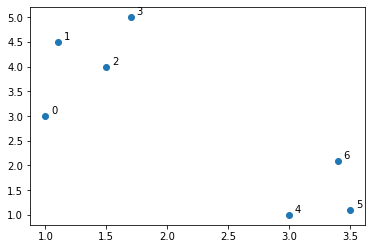

In [7]:
plt.scatter(x[:,0],x[:,1])
for i in range(x.shape[0]):
    plt.text(x[i,0]+0.05, x[i,1]+0.05, str(i))

In [8]:
dm = distance_matrix(x,x)
print(np.round(dm,2))

[[0.   1.5  1.12 2.12 2.83 3.14 2.56]
 [1.5  0.   0.64 0.78 3.98 4.16 3.32]
 [1.12 0.64 0.   1.02 3.35 3.52 2.69]
 [2.12 0.78 1.02 0.   4.21 4.3  3.36]
 [2.83 3.98 3.35 4.21 0.   0.51 1.17]
 [3.14 4.16 3.52 4.3  0.51 0.   1.  ]
 [2.56 3.32 2.69 3.36 1.17 1.   0.  ]]


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [12.5, 12.5, 43.75, 43.75]],
 'dcoord': [[0.0, 0.5099019513592785, 0.5099019513592785, 0.0],
  [0.0, 1.004987562112089, 1.004987562112089, 0.5099019513592785],
  [0.0, 0.6403124237432848, 0.6403124237432848, 0.0],
  [0.0, 0.7810249675906653, 0.7810249675906653, 0.6403124237432848],
  [0.0, 1.118033988749895, 1.118033988749895, 0.7810249675906653],
  [1.004987562112089,
   2.563201123595259,
   2.563201123595259,
   1.118033988749895]],
 'ivl': [6, 4, 5, 0, 3, 1, 2],
 'leaves': [6, 4, 5, 0, 3, 1, 2],
 'color_list': ['C1', 'C1', 'C2', 'C2', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2']}

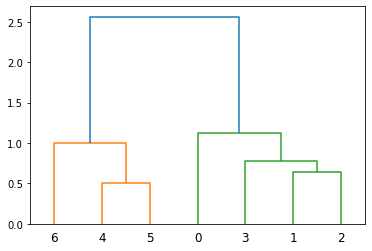

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure()
dendrogram(linkage(x,'single'), labels=range(0,7))

In [10]:
from sklearn.cluster import AgglomerativeClustering

myCluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
myCluster.fit_predict(x)

array([0, 0, 0, 0, 1, 1, 1], dtype=int64)

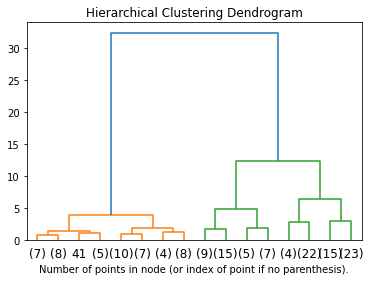

In [13]:
# Taken from scikit learn website https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

from sklearn.datasets import load_iris

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()